In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [26]:
df.reset_index(drop = True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.rename(columns = {'Living.Room' : 'LivingRoom'})

,Sqft,Floor,TotalFloor,Bedroom,LivingRoom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [19]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,4.406467e-17,-4.406467e-17,-4.406467e-17,-1.432102e-16,2.451097e-16,3.304850e-17,-1.046536e-16
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.523619e+00,-1.272516e+00,-1.974190e+00,-1.819099e+00,-3.926263e+00,-2.651152e+00,-1.569526e+00
25%,-7.858412e-01,-7.572786e-01,-7.723470e-01,-8.289563e-01,4.026936e-01,-1.187117e+00,-6.455621e-01
50%,-1.362251e-01,-2.420416e-01,2.291886e-01,1.611860e-01,4.026936e-01,2.769182e-01,-3.366380e-01
75%,4.762700e-01,5.308140e-01,6.298029e-01,1.151328e+00,4.026936e-01,2.769182e-01,3.654621e-01
max,5.645358e+00,4.137473e+00,5.437174e+00,4.121755e+00,4.731650e+00,4.669023e+00,5.280163e+00


In [20]:
# Optimum number of clusters using elbow method
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [23]:
kmeans.inertia_

2154.2698559382275

In [22]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data)
    kmeanModel.fit(scaled_data)

    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_data.shape[0]
    mapping2[k] = kmeanModel.inertia_   

1 : 2.3615265828331347
2 : 1.9847844864092707
3 : 1.7681728418731681
4 : 1.6551230085921556
5 : 1.5233413929637645
6 : 1.461067343811256
7 : 1.414843722865522
8 : 1.3512824477709684
9 : 1.3117530055065552
10 : 1.2727082205175215
11 : 1.2554863173947632
12 : 1.2252991486232137
13 : 1.1983841590786353
14 : 1.172796253048165


[]

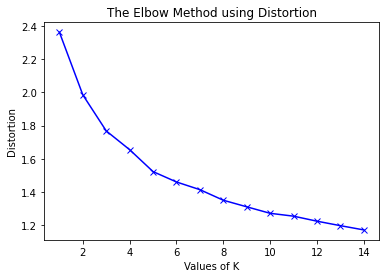

In [24]:
for key, val in mapping1.items():
    print(str(key)+' : '+str(val))

# Visulaization -
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.plot()

1 : 4515.0
2 : 3205.723708410711
3 : 2502.4632671880563
4 : 2154.2426983704468
5 : 1880.8765014113796
6 : 1725.7313289148015
7 : 1593.756486028206
8 : 1494.5203313198026
9 : 1410.8823041269072
10 : 1335.9658969437087
11 : 1273.2085282496867
12 : 1230.6387276041085
13 : 1171.752335454854
14 : 1139.4720969574819


[]

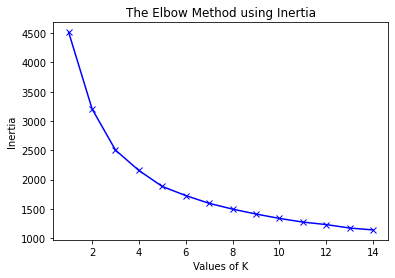

In [25]:
for key, val in mapping2.items():
    print(str(key)+' : '+str(val))

# Visulaization -
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.plot()

In [29]:
kmeans = KMeans( n_clusters = 5, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    211
4    175
2    113
0    108
3     38
Name: cluster, dtype: int64